##Machine Learning Analysis Report: Olympic Athletes Dataset

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('athlete_events.csv')


 Handle missing values

In [22]:
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Height'].fillna(data['Height'].median(), inplace=True)
data['Weight'].fillna(data['Weight'].median(), inplace=True)
data['Medal'].fillna('No Medal', inplace=True)


 Encode categorical features using LabelEncoder

In [23]:
categorical_columns = ['Gender', 'Team', 'NOC', 'Games', 'Season', 'City', 'Sport', 'Event', 'Medal']
label_encoders = {}


In [24]:
for column in categorical_columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

Standardize numerical features

In [25]:
scaler = StandardScaler()
data[['Age', 'Height', 'Weight']] = scaler.fit_transform(data[['Age', 'Height', 'Weight']])

Splitting data into features and target variable

In [26]:
X = data.drop(columns=['Medal', 'ID', 'Name'])
y = data['Medal']

Split the data into training and testing sets (80% training, 20% testing)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Model Selection and Training
# Using Random Forest Classifier as the machine learning model

In [28]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Model Evaluation
# Make predictions on the test set

In [29]:
y_pred = model.predict(X_test)

Evaluate the model's performance using accuracy, precision, recall, and F1-score

In [30]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8979971968132192

Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.35      0.46      2692
           1       0.72      0.52      0.60      2639
           2       0.92      0.98      0.95     46290
           3       0.65      0.38      0.48      2603

    accuracy                           0.90     54224
   macro avg       0.74      0.56      0.62     54224
weighted avg       0.88      0.90      0.89     54224



Confusion Matrix Visualization

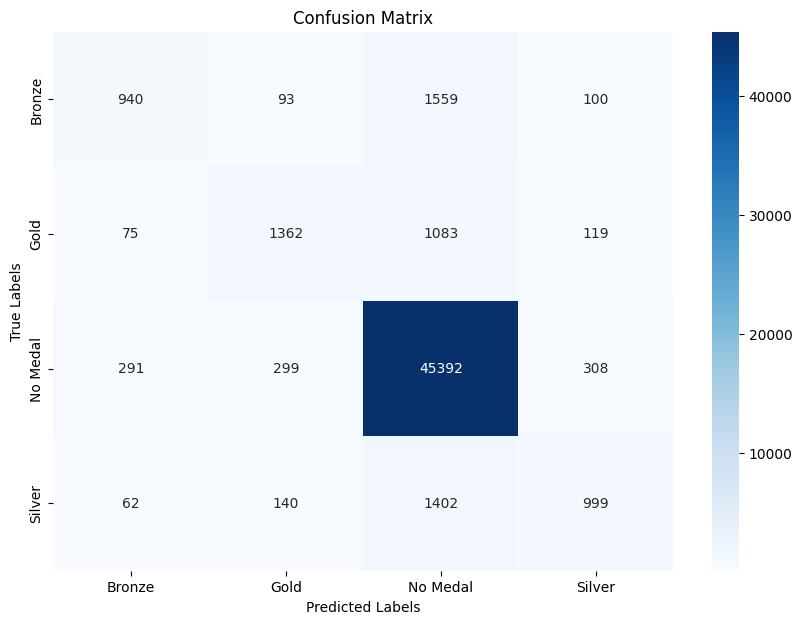

In [31]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoders['Medal'].classes_, yticklabels=label_encoders['Medal'].classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()